In [2]:
#Dataset Overview.
import pandas as pd
import numpy as np

df = pd.read_csv('f1_winners.csv')  # Use your dataset name

# Show first and last 5 rows
display(df.head())
display(df.tail())

# Show shape, column names, data types
display(f"Shape: {df.shape}")
display(f"Columns: {list(df.columns)}")
display(f"Data types:\n{df.dtypes}")

# Count missing values and unique values
display("Missing values:\n", df.isnull().sum())
display("Unique values per column:\n", df.nunique())


,Grand Prix,Date,Winner,Car,Laps,Time,Name Code
0,Great Britain,1950-05-13,Nino Farina,Alfa Romeo,70.0,2:13:23.600,FAR
1,Monaco,1950-05-21,Juan Manuel Fangio,Alfa Romeo,100.0,3:13:18.700,FAN
2,Indianapolis 500,1950-05-30,Johnnie Parsons,Kurtis Kraft Offenhauser,138.0,2:46:55.970,PAR
3,Switzerland,1950-06-04,Nino Farina,Alfa Romeo,42.0,2:02:53.700,FAR
4,Belgium,1950-06-18,Juan Manuel Fangio,Alfa Romeo,35.0,2:47:26.000,FAN


,Grand Prix,Date,Winner,Car,Laps,Time,Name Code
1105,Saudi Arabia,2024-03-09,Max Verstappen,Red Bull Racing Honda RBPT,50.0,1:20:43.273,VER
1106,Australia,2024-03-24,Carlos Sainz,Ferrari,58.0,1:20:26.843,SAI
1107,Japan,2024-04-07,Max Verstappen,Red Bull Racing Honda RBPT,53.0,1:54:23.566,VER
1108,China,2024-04-21,Max Verstappen,Red Bull Racing Honda RBPT,56.0,1:40:52.554,VER
1109,Miami,2024-05-05,Lando Norris,McLaren Mercedes,57.0,1:30:49.876,NOR


'Shape: (1110, 7)'

"Columns: ['Grand Prix', 'Date', 'Winner', 'Car', 'Laps', 'Time', 'Name Code']"

'Data types:\nGrand Prix     object\nDate           object\nWinner         object\nCar            object\nLaps          float64\nTime           object\nName Code      object\ndtype: object'

'Missing values:\n'

Grand Prix    0
Date          0
Winner        0
Car           0
Laps          3
Time          3
Name Code     0
dtype: int64

'Unique values per column:\n'

Grand Prix      53
Date          1107
Winner         115
Car             63
Laps            73
Time          1106
Name Code      109
dtype: int64

In [4]:
#Data Quality Checks.

# Check for duplicate rows
display("Duplicate rows:", df.duplicated().sum())

# Check for questionable data (negative/zero laps)
display("Invalid laps:", df[(df['Laps'] <= 0) | (df['Laps'].isnull())])

# Check for formatting issues
display("Rows with leading/trailing spaces in Winner:", (df['Winner'].str.strip() != df['Winner']).sum())

# display a sample of Winner column
display("Sample Winner names:", df['Winner'].head().tolist())


'Duplicate rows:'

0

'Invalid laps:'

,Grand Prix,Date,Winner,Car,Laps,Time,Name Code
11,France,1951-07-01,Luigi Fagioli,Alfa Romeo,NaN,NaN,FAG
49,Argentina,1956-01-22,Luigi Musso,Ferrari,NaN,NaN,MUS
63,Great Britain,1957-07-20,Tony Brooks,Vanwall,NaN,NaN,BRO


'Rows with leading/trailing spaces in Winner:'

1106

'Sample Winner names:'

['Nino  Farina ',
 'Juan Manuel  Fangio ',
 'Johnnie Parsons ',
 'Nino  Farina ',
 'Juan Manuel  Fangio ']

In [5]:
#Data Cleaning.

# Fill missing 'Laps' with median; 'Time' with forward fill
df['Laps'].fillna(df['Laps'].median(), inplace=True)
df['Time'].fillna(method='ffill', inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Strip leading/trailing spaces from 'Winner'
df['Winner'] = df['Winner'].str.strip()

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])
display("Cleaned data preview:\n", df.head())


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17612\1512177210.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Laps'].fillna(df['Laps'].median(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17612\1512177210.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

'Cleaned data preview:\n'

,Grand Prix,Date,Winner,Car,Laps,Time,Name Code
0,Great Britain,1950-05-13,Nino Farina,Alfa Romeo,70.0,2:13:23.600,FAR
1,Monaco,1950-05-21,Juan Manuel Fangio,Alfa Romeo,100.0,3:13:18.700,FAN
2,Indianapolis 500,1950-05-30,Johnnie Parsons,Kurtis Kraft Offenhauser,138.0,2:46:55.970,PAR
3,Switzerland,1950-06-04,Nino Farina,Alfa Romeo,42.0,2:02:53.700,FAR
4,Belgium,1950-06-18,Juan Manuel Fangio,Alfa Romeo,35.0,2:47:26.000,FAN


In [7]:
#Descriptive Statistics.

# Numeric stats (Laps)
display(df['Laps'].describe())
display(f"Skewness: {df['Laps'].skew():.2f}")
display(f"Kurtosis: {df['Laps'].kurtosis():.2f}")

# Categorical summaries
display("Top 10 Winners:\n", df['Winner'].value_counts().head(10))
display("Top 10 Grand Prix:\n", df['Grand Prix'].value_counts().head(10))
display("Top 10 Cars:\n", df['Car'].value_counts().head(10))
display("Top Name Codes:\n", df['Name Code'].value_counts().head(10))


count    1110.000000
mean       64.654955
std        20.240102
min         1.000000
25%        54.000000
50%        65.000000
75%        72.000000
max       200.000000
Name: Laps, dtype: float64

'Skewness: 2.49'

'Kurtosis: 16.85'

'Top 10 Winners:\n'

Winner
Lewis  Hamilton        103
Michael  Schumacher     91
Max  Verstappen         58
Sebastian  Vettel       53
Alain  Prost            51
Ayrton  Senna           41
Fernando  Alonso        32
Nigel  Mansell          31
Jackie  Stewart         27
Jim  Clark              25
Name: count, dtype: int64

'Top 10 Grand Prix:\n'

Grand Prix
Great Britain    75
Italy            74
Monaco           69
Belgium          68
Germany          64
France           63
Spain            53
Canada           52
Brazil           50
United States    39
Name: count, dtype: int64

'Top 10 Cars:\n'

Car
Ferrari                       245
Mercedes                      116
McLaren Mercedes               80
Williams Renault               64
Lotus Ford                     47
McLaren Honda                  44
Renault                        35
McLaren Ford                   35
Red Bull Racing Renault        35
Red Bull Racing Honda RBPT     25
Name: count, dtype: int64

'Top Name Codes:\n'

Name Code
HAM    103
MSC     91
VER     57
VET     53
PRO     51
SEN     41
HIL     39
ALO     32
MAN     31
ROS     28
Name: count, dtype: int64

In [15]:
#Data Transformation & Encoding.

from sklearn.preprocessing import StandardScaler, LabelEncoder

# Scale 'Laps'
scaler = StandardScaler()
df['Laps_Scaled'] = scaler.fit_transform(df[['Laps']])

# Log transformation to reduce skewness
df['Laps_Log'] = np.log1p(df['Laps'])

# Label Encode categorical columns
le_winner = LabelEncoder()
df['Winner_Encoded'] = le_winner.fit_transform(df['Winner'])
le_gp = LabelEncoder()
df['GrandPrix_Encoded'] = le_gp.fit_transform(df['Grand Prix'])
le_car = LabelEncoder()
df['Car_Encoded'] = le_car.fit_transform(df['Car'])
display(df)


,Grand Prix,Date,Winner,Car,Laps,Time,Name Code,Laps_Scaled,Laps_Log,Winner_Encoded,GrandPrix_Encoded,Car_Encoded
0,Great Britain,1950-05-13,Nino Farina,Alfa Romeo,70.0,2:13:23.600,FAR,0.264201,4.262680,83,19,0
1,Monaco,1950-05-21,Juan Manuel Fangio,Alfa Romeo,100.0,3:13:18.700,FAN,1.747075,4.615121,60,30,0
2,Indianapolis 500,1950-05-30,Johnnie Parsons,Kurtis Kraft Offenhauser,138.0,2:46:55.970,PAR,3.625382,4.934474,57,22,22
3,Switzerland,1950-06-04,Nino Farina,Alfa Romeo,42.0,2:02:53.700,FAR,-1.119815,3.761200,83,47,0
4,Belgium,1950-06-18,Juan Manuel Fangio,Alfa Romeo,35.0,2:47:26.000,FAN,-1.465819,3.583519,60,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1105,Saudi Arabia,2024-03-09,Max Verstappen,Red Bull Racing Honda RBPT,50.0,1:20:43.273,VER,-0.724382,3.931826,74,40,46
1106,Australia,2024-03-24,Carlos Sainz,Ferrari,58.0,1:20:26.843,SAI,-0.328949,4.077537,10,3,17
1107,Japan,2024-04-07,Max Verstappen,Red Bull Racing Honda RBPT,53.0,1:54:23.566,VER,-0.576094,3.988984,74,24,46
1108,China,2024-04-21,Max Verstappen,Red Bull Racing Honda RBPT,56.0,1:40:52.554,VER,-0.427807,4.043051,74,11,46


In [16]:
#Outlier Detection & Treatment.

# IQR Method
Q1 = df['Laps'].quantile(0.25)
Q3 = df['Laps'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = df[(df['Laps'] < lower) | (df['Laps'] > upper)]
display("Number of outliers (IQR):", len(outliers))
display("Outlier samples:\n", outliers[['Grand Prix', 'Date', 'Winner', 'Laps']].head(10))

# Z-score method
from scipy import stats
z_scores = np.abs(stats.zscore(df['Laps']))
extreme_outliers = df[z_scores > 3]
display("Number of extreme outliers (Z-score):", len(extreme_outliers))

# Treat outliers: capping
df['Laps_Capped'] = df['Laps'].clip(lower=lower, upper=upper)


'Number of outliers (IQR):'

65

'Outlier samples:\n'

,Grand Prix,Date,Winner,Laps
1,Monaco,1950-05-21,Juan Manuel Fangio,100.0
2,Indianapolis 500,1950-05-30,Johnnie Parsons,138.0
8,Indianapolis 500,1951-05-30,Lee Wallard,200.0
13,Germany,1951-07-29,Alberto Ascari,20.0
17,Indianapolis 500,1952-05-30,Troy Ruttman,200.0
21,Germany,1952-08-03,Alberto Ascari,18.0
25,Indianapolis 500,1953-05-30,Bill Vukovich,200.0
30,Germany,1953-08-02,Nino Farina,18.0
34,Indianapolis 500,1954-05-31,Bill Vukovich,200.0
38,Germany,1954-08-01,Juan Manuel Fangio,22.0


'Number of extreme outliers (Z-score):'

12

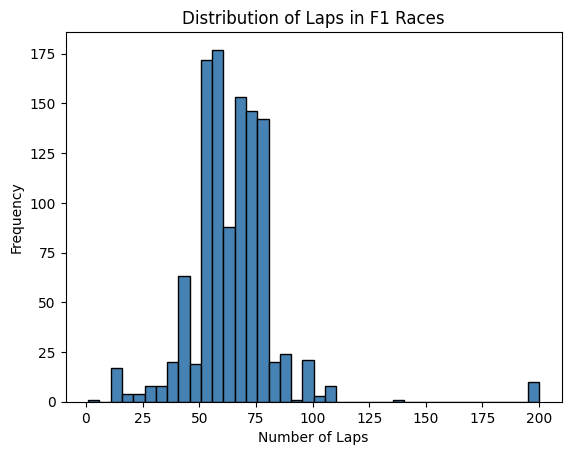

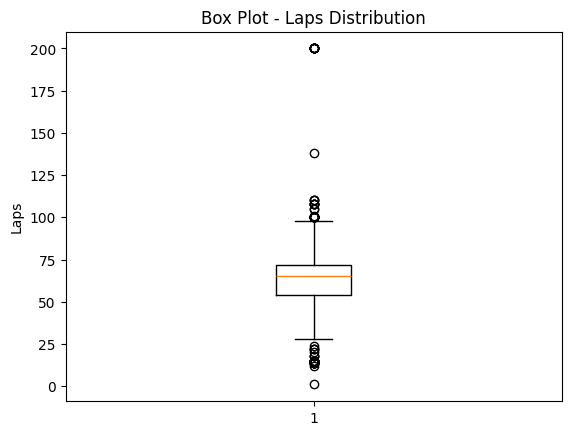

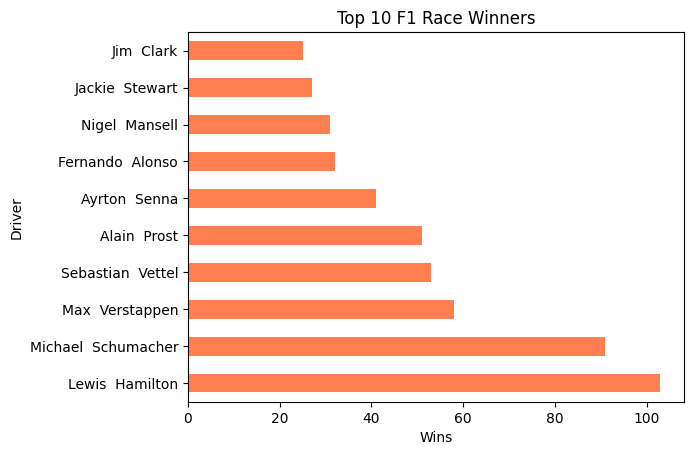

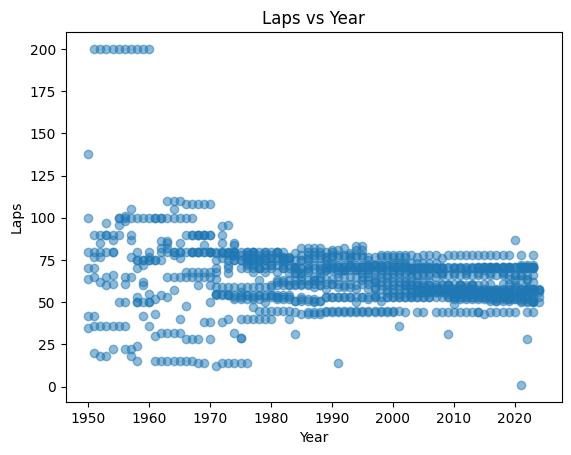

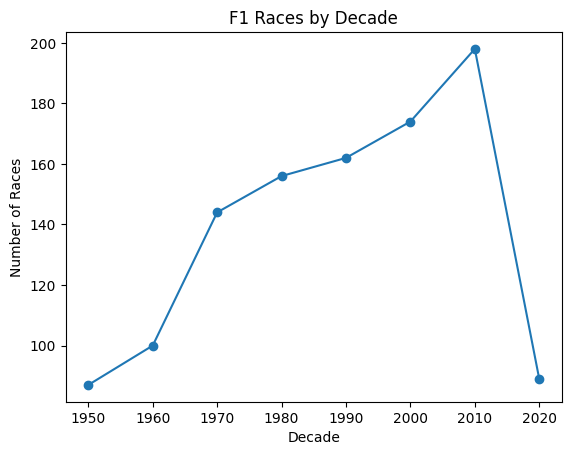

In [17]:
#Data Visualization.

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Laps
plt.hist(df['Laps'], bins=40, color='steelblue', edgecolor='black')
plt.title('Distribution of Laps in F1 Races')
plt.xlabel('Number of Laps')
plt.ylabel('Frequency')
plt.show()

# Box plot for Laps
plt.boxplot(df['Laps'])
plt.ylabel('Laps')
plt.title('Box Plot - Laps Distribution')
plt.show()

# Bar chart for Top 10 Winners
top_winners = df['Winner'].value_counts().head(10)
top_winners.plot(kind='barh', color='coral')
plt.xlabel('Wins')
plt.ylabel('Driver')
plt.title('Top 10 F1 Race Winners')
plt.show()

# Scatter plot for Laps vs Year
df['Year'] = df['Date'].dt.year
plt.scatter(df['Year'], df['Laps'], alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Laps')
plt.title('Laps vs Year')
plt.show()

# Line chart for races per decade
df['Decade'] = (df['Year'] // 10) * 10
decade_counts = df['Decade'].value_counts().sort_index()
decade_counts.plot(kind='line', marker='o')
plt.xlabel('Decade')
plt.ylabel('Number of Races')
plt.title('F1 Races by Decade')
plt.show()


In [18]:
#Insights & Interpretation.

display("\nKey Insights:")
display(f"- Most successful driver: Lewis Hamilton ({df['Winner'].value_counts().iloc[0]} wins)")
display(f"- Ferrari dominates constructors ({df['Car'].value_counts().iloc[0]} wins)")
display(f"- Most frequent venue: {df['Grand Prix'].value_counts().idxmax()} ({df['Grand Prix'].value_counts().max()} races)")
display(f"- Average laps: {df['Laps'].mean():.2f}")
display(f"- Outliers mainly from Indianapolis 500 (200 laps)/Belgium 2021 (1 lap)")
display(f"- Dramatic increase in number of races per year/decade")
display(f"- Data is clean, well-structured, and ML-ready!")


'\nKey Insights:'

'- Most successful driver: Lewis Hamilton (103 wins)'

'- Ferrari dominates constructors (245 wins)'

'- Most frequent venue: Great Britain (75 races)'

'- Average laps: 64.65'

'- Outliers mainly from Indianapolis 500 (200 laps)/Belgium 2021 (1 lap)'

'- Dramatic increase in number of races per year/decade'

'- Data is clean, well-structured, and ML-ready!'

In [20]:
# Final cleaned dataset
df.to_csv('f1_winners_cleaned_final.csv', index=False)
